In [81]:
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images to fit the CNN input
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the original images
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 36s 35ms/step - loss: 0.1836 - accuracy: 0.9424 - val_loss: 0.0592 - val_accuracy: 0.9816
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 3/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0333 - accuracy: 0.9901 - val_loss: 0.0292 - val_accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0293 - val_accuracy: 0.9913
Epoch 5/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0258 - val_accuracy: 0.9913


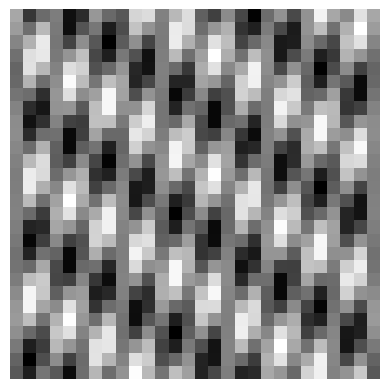

In [214]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x, y = np.meshgrid(np.linspace(-1, 1, 28), np.linspace(-1, 1, 28))

# Define two sine waves with slightly different frequencies and phases
w1 = np.sin(5*np.pi*x + 0.1*np.pi*y)
w2 = np.cos(3*np.pi*x + 3*np.pi*y)

# Combine the two waves to create a moiré pattern
moire = w1 * w2

moire = np.array((moire).astype(np.float32)).reshape([28, 28, 1])
# Display the pattern using Matplotlib
plt.imshow((moire), cmap='gray')
plt.axis('off')
plt.show()
m = np.dstack((moire,moire,moire))

## Generate Moire pattern

313/313 [==============================] - 2s 5ms/step - loss: 0.0258 - accuracy: 0.9913
Test accuracy (original images): 0.9912999868392944
Test accuracy (images with moiré patterns): 0.9638000130653381
313/313 [==============================] - 2s 5ms/step - loss: 0.0258 - accuracy: 0.9913
Test accuracy (original images): 0.9912999868392944
Test accuracy (images with moiré patterns): 0.9430000185966492
313/313 [==============================] - 2s 5ms/step - loss: 0.0258 - accuracy: 0.9913
Test accuracy (original images): 0.9912999868392944
Test accuracy (images with moiré patterns): 0.9071000218391418
313/313 [==============================] - 2s 6ms/step - loss: 0.0258 - accuracy: 0.9913
Test accuracy (original images): 0.9912999868392944
Test accuracy (images with moiré patterns): 0.8579000234603882
313/313 [==============================] - 2s 6ms/step - loss: 0.0258 - accuracy: 0.9913
Test accuracy (original images): 0.9912999868392944
Test accuracy (images with moiré patterns):

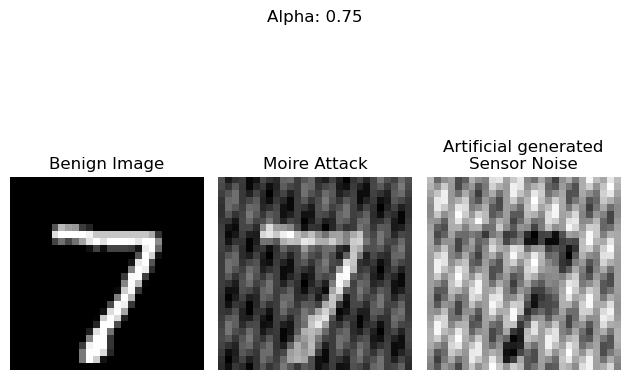

In [215]:
alpha_val = [0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4]
clean_acc = []
moire_acc = []

def generate_moire_images(image, alpha=0.4):
    beta = (1.0 - alpha)
    gamma = np.random.random()
    masked_img = cv2.addWeighted(image, alpha, moire, beta, gamma)
    masked_img = np.array(masked_img).reshape([28, 28, 1])
    return masked_img

for alphas in alpha_val:
    moire_images = [generate_moire_images(test_image, alpha=alphas) for test_image in test_images]
    moire_images = np.array(moire_images)
   
#     plt.suptitle(f'Alpha: {alpha_vals}')
#     plt.subplot(1,3,1)
#     plt.axis('off')
#     plt.tight_layout()
#     plt.imshow(test_images[0], cmap='gray')
    
#     plt.subplot(1,3,2)
#     plt.axis('off')
#     plt.tight_layout()
#     plt.imshow(masked_img[0], cmap='gray')
    
#     plt.subplot(1,3,3)
#     plt.axis('off')
#     plt.tight_layout()
#     plt.imshow(abs(test_images[0] - masked_img[0]), cmap='gray')
#     plt.show()
    
    # Evaluate the model on the test images with moiré patterns
    test_loss_moire, test_acc_moire = model.evaluate(moire_images, test_labels)
    moire_acc.append(test_acc_moire)
    # Evaluate the model on the original test images
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    clean_acc.append(test_acc)
    
    print(f'Test accuracy (original images): {test_acc}')
    print(f'Test accuracy (images with moiré patterns): {test_acc_moire}')

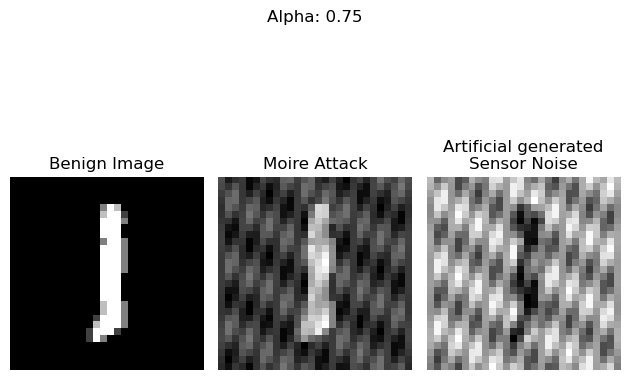

In [216]:
plt.suptitle(f'Alpha: {alpha_vals}')
plt.subplot(1,3,1)
plt.title('Benign Image')
plt.axis('off')
plt.tight_layout()
plt.imshow(test_images[14], cmap='gray')

plt.subplot(1,3,2)
plt.title('Moire Attack')
plt.axis('off')
plt.tight_layout()
plt.imshow(masked_img[14], cmap='gray')

plt.subplot(1,3,3)
plt.title('Artificial generated\nSensor Noise')
plt.axis('off')
plt.tight_layout()
plt.imshow(abs(test_images[14] - masked_img[14]), cmap='gray')
plt.show()

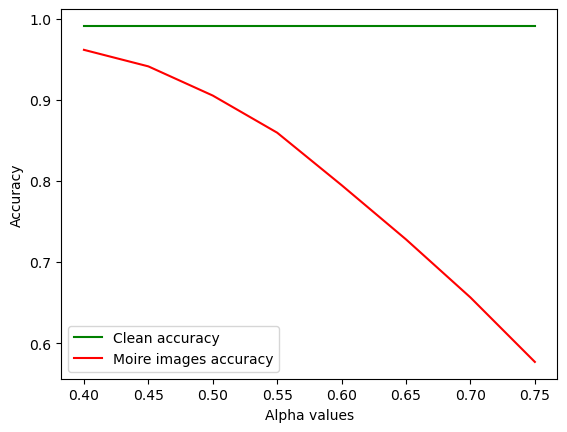

In [200]:
plt.xlabel('Alpha values')
plt.ylabel('Accuracy')
plt.plot(alpha_val[::-1], clean_acc, c='green')
plt.plot(alpha_val[::-1], moire_acc, c='red')
plt.legend(['Clean accuracy', 'Moire images accuracy'])